# Titanic - Machine Learning from Disaster
## Vamos utilizar os dados disponíveis no Kaggle: https://www.kaggle.com/competitions/titanic
## - É um dataset de competição
## - O resultado é avaliado através da acurácia

## Importação da base de dados

In [ ]:
!pip install jupyterlab

In [3]:
import pandas as pd

In [4]:
# Importando as bases de dados
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

In [5]:
# Visualização da base de treino
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
!pip install ydata-profiling

In [7]:
from ydata_profiling import ProfileReport

# Gerando a visualização
profile = ProfileReport(treino, title="titanic_treino", explorative=True)

In [8]:
# Criando relatório
profile.to_file("titanic_treino.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 32.99it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Análise da base de treino

In [9]:
# Verificando infos da base de treino
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Verificando o tipo de dados
treino.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [11]:
# verificando valores nulos
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

## Análise da base de teste

In [12]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
# verificando valores nulos
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

#### Temos colunas que possuem valores vazios na base de teste que não estão vazias na base de treino

## Tratamentos iniciais dos dados

In [14]:
# verificando novamente valores nulos
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [19]:
# Shape da base
treino.shape

(891, 12)

In [21]:
# Visualizando novamente a base
treino.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Verificando cardinalidade dos dados
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

#### Colunas com alta cardinalidade = Name, Ticket, Cabin. É necessário Eliminar essas colunas, pois torna o modelo menos generalizável.

In [23]:
# Eliminado na base treino
treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [24]:
# Eliminado na base teste
teste = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#### Tratamento da coluna Age (Possui valores vazios)

In [26]:
# Verificando média das idades
treino.Age.mean()

29.69911764705882

In [27]:
# Substituir colunas com idade vazia pela média
treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean() 

In [28]:
# O mesmo para base de teste
teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean() 

#### Tratamento da coluna Embarked (Possui 2 valores vazios)

In [32]:
# Verificando valores mais frequentes da coluna
treino.Embarked.value_counts(), treino.Embarked.mode()[0]

(Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64,
 'S')

In [34]:
# Substituir pela moda dos valores (='S')
treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

#### Tratamento da coluna Fare (1 valor vazio)

In [36]:
# Substituindo valor vazio pela média
teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

#### Verificação de valores vazios

In [37]:
treino.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [38]:
teste.isnull().sum().sort_values(ascending=False).head(5)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

### Colunas que não são de texto

In [42]:
# Colunas de texto
treino.columns[treino.dtypes != 'object'], teste.columns[teste.dtypes != 'object'] 

(Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'),
 Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object'))

In [41]:
# Valores numéricos
treino_num = treino.loc[:,treino.columns[treino.dtypes != 'object']]

# Base teste
teste_num = teste.loc[:,teste.columns[teste.dtypes != 'object']]

## Selecionar um modelo para classificar dados

### Separando a base em: treino e validação

In [43]:
# Importando train_test_split
from sklearn.model_selection import train_test_split

In [45]:
# Separando a base de treino em x e y
x = treino_num.drop(['PassengerId', 'Survived'], axis=1)
y = treino.Survived

In [46]:
# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

### Árvore de classificação 

In [51]:
# Fazendo a importação
from sklearn import tree

# Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

# Fazendo o fit com os dados
clf_ac = clf_ac.fit(x_train,y_train)

# Fazendo a previsão
y_previsao_ac = clf_ac.predict(x_val)
y_previsao_ac

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

### KNN (K-Neighbors Classifier)

In [52]:
# Importando
from sklearn.neighbors import KNeighborsClassifier

# Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Fazendo o fit com os dados
clf_knn = clf_knn.fit(x_train,y_train)

# Fazendo a previsão
y_previsao_knn = clf_knn.predict(x_val)
y_previsao_knn

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

### Regressão Logística

In [54]:
# Importando
from sklearn.linear_model import LogisticRegression

# Criando o classificador
clf_rl = LogisticRegression(random_state=42)

# Fazendo o fit com os dados
clf_rl = clf_rl.fit(x_train,y_train)

# Fazendo a previsão
y_previsao_rl = clf_rl.predict(x_val)
y_previsao_rl

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

## Avaliação dos modelos

### Avaliando acurácia

In [56]:
# Importando
from sklearn.metrics import accuracy_score

# Para a árvore
accuracy_score(y_val, y_previsao_ac)

0.6169491525423729

In [57]:
# Para o knn
accuracy_score(y_val, y_previsao_knn)

0.6542372881355932

In [58]:
# Para o knn
accuracy_score(y_val, y_previsao_rl)

0.7254237288135593

### Avaliando matriz de confusão

In [62]:
# Importando
from sklearn.metrics import confusion_matrix

# Para a árvore
confusion_matrix(y_val, y_previsao_ac)

array([[125,  50],
       [ 63,  57]], dtype=int64)

In [64]:
# Para o knn
confusion_matrix(y_val, y_previsao_knn)

array([[133,  42],
       [ 60,  60]], dtype=int64)

In [66]:
# Para a regressão logística
confusion_matrix(y_val, y_previsao_rl)

array([[156,  19],
       [ 62,  58]], dtype=int64)

### Previsão para os dados de teste

In [69]:
x_train.head(3)

,Pclass,Age,SibSp,Parch,Fare
6,1,54.000000,0,0,51.8625
718,3,29.699118,0,0,15.5000
685,2,25.000000,1,2,41.5792


In [70]:
teste_num.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [71]:
# Eliminando coluna PassengerId
x_teste = teste_num.drop("PassengerId", axis=1)

In [74]:
# regressão logística na base de teste
y_previsao = clf_rl.predict(x_teste)
y_previsao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [77]:
# Criando nova coluna com a previsão na base de teste
teste['Survived'] = y_previsao

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId', 'Survived']]
base_envio

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
# Exportar para csv
base_envio.to_csv('resultados2.csv', index=False)

### Score da análise
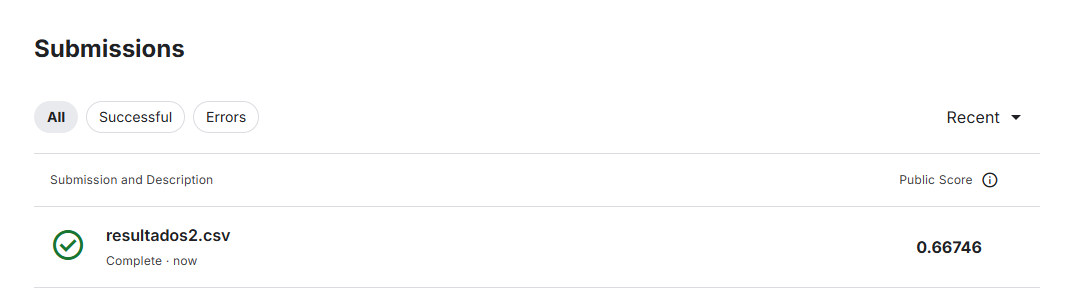